### Testing Flask API

Calling the Flask /image endpoint with hex=#FF0000


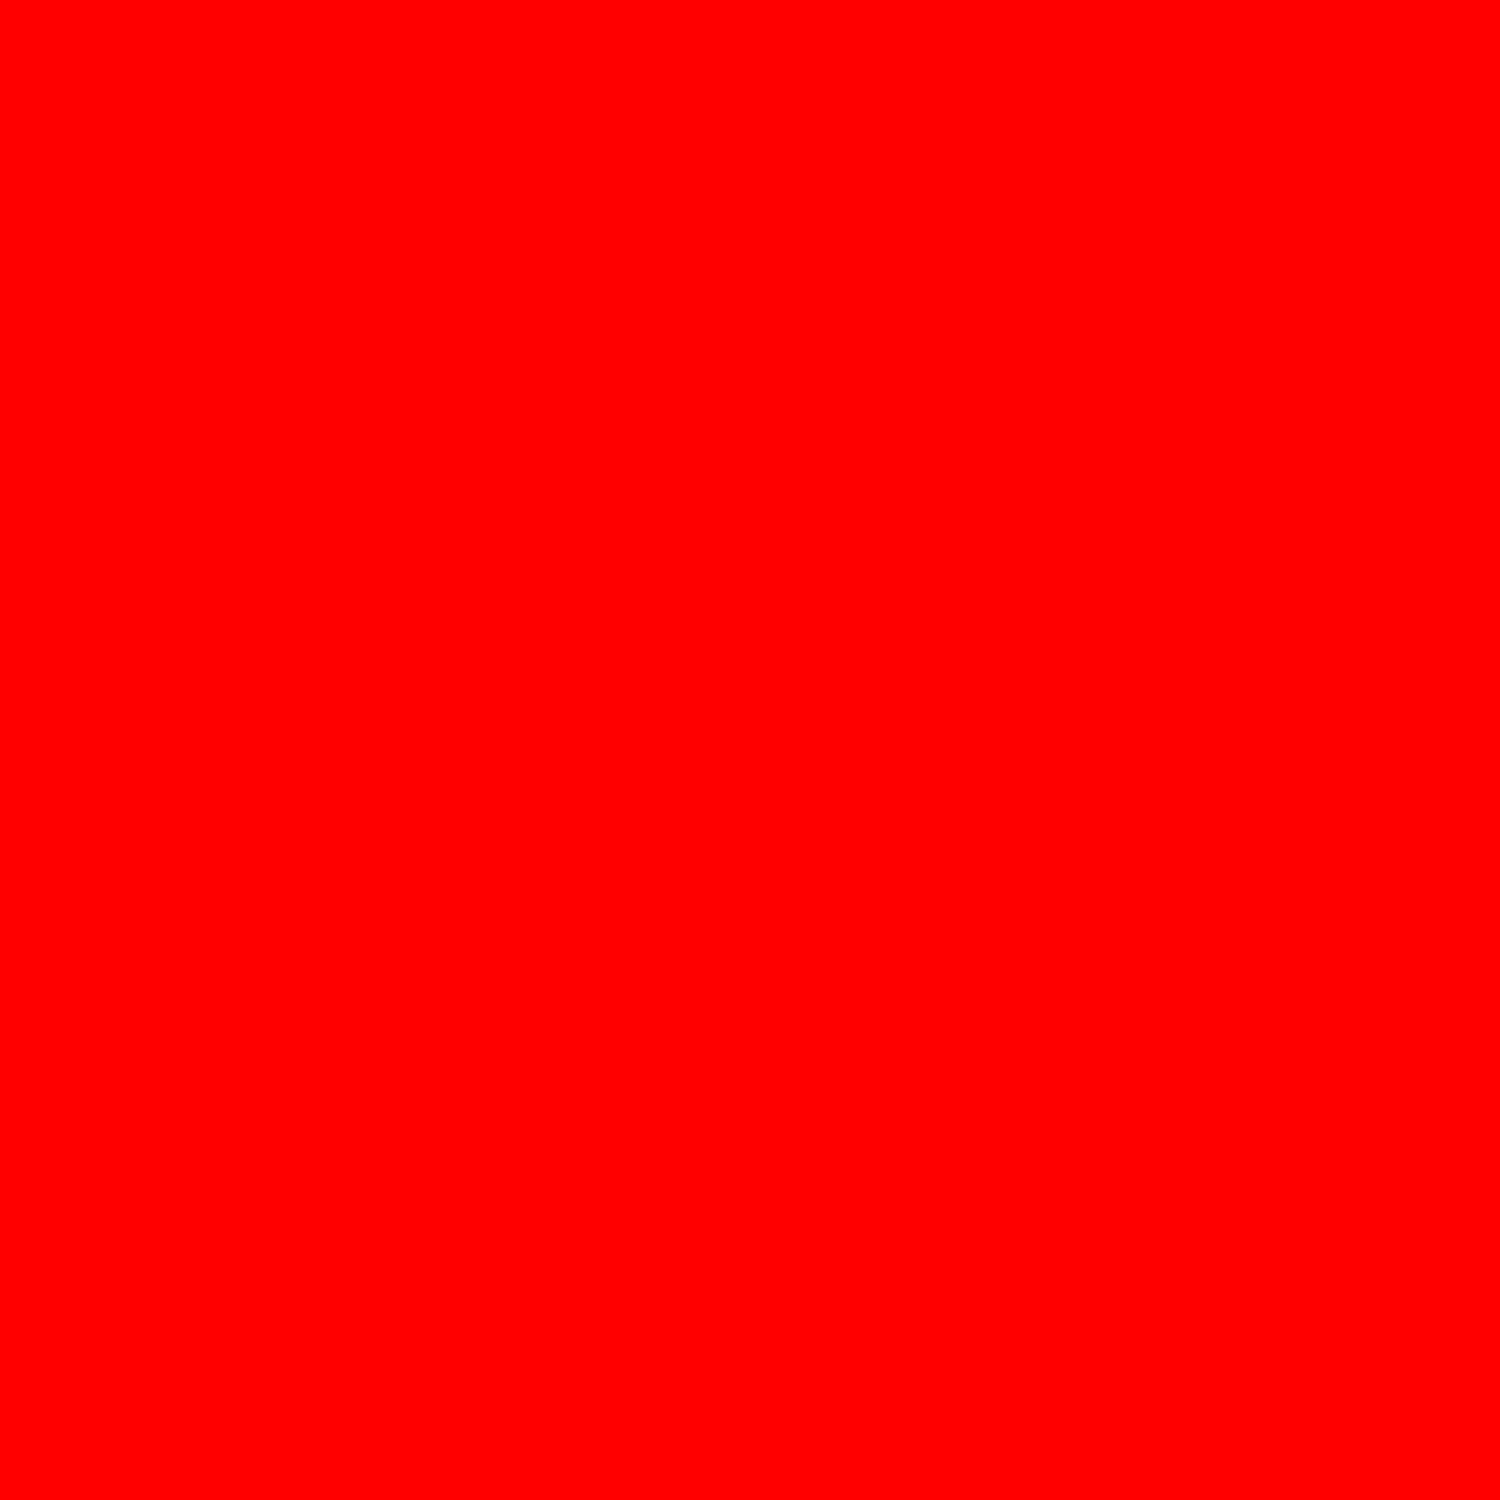

Flask API test stopped


In [1]:
import subprocess
import time
import requests
import base64
from IPython.display import Image, display

# Path to the Flask app file
FLASK_APP_PATH = r"C:\Users\karan\AI-Engineer-Challenge\flask_app\flask_app.py"

# The endpoint 
FLASK_URL = "http://127.0.0.1:5000/image"

# Start the Flask application
flask_process = subprocess.Popen(["python", FLASK_APP_PATH])

time.sleep(1)

# Testing image endpoint with red color
print("Calling the Flask endpoint with hex=#FF0000")
resp = requests.post(FLASK_URL, json={"hex": "#FF0000"})

# Check if we got a successful response
if resp.status_code == 200:
    data = resp.json()
    # Extract the base64 string from the JSON
    b64_img = data["image"]
    # Convert the base64-encoded bytes to image
    img_bytes = base64.b64decode(b64_img)
    # Display the image 
    display(Image(data=img_bytes))
else:
    print("Flask API returned an error:", resp.text)

# Stopping the Flask application 
flask_process.terminate()
flask_process.wait()

In [3]:
import weaviate

client = weaviate.Client("http://localhost:8080")

# Create class 
try:
    client.schema.delete_class("Colors")
except Exception:
    pass  


# Define colors schema with no internal vectorization
colors_schema = {
    "class": "Colors",
    "vectorizer": "none",
    "properties": [
        {
            "name": "key",
            "dataType": ["string"]
        },
        {
            "name": "description",
            "dataType": ["string"]
        }
    ]
}

# Create colors class in Weaviate
client.schema.create_class(colors_schema)

# Example vectors
items_to_insert = [
    {"key": "red",   "description": "This is the color red.",   "vector": [1.0, 0.0, 0.0]},
    {"key": "green", "description": "This is the color green.", "vector": [0.0, 1.0, 0.0]},
    {"key": "blue",  "description": "This is the color blue.",  "vector": [0.0, 0.0, 1.0]}
]

# Inserting items
for item in items_to_insert:
    data = {
        "key": item["key"],
        "description": item["description"]
    }
    client.data_object.create(
        data_object=data,
        class_name="Colors",
        vector=item["vector"]  
    )

# Query the Colors class using Weaviate 
results = client.query.get("Colors", ["key", "description"]).do()

print("Query Output:")
print("")
print(results)

Query Output:
 
{'data': {'Get': {'Colors': [{'description': 'This is the color green.', 'key': 'green'}, {'description': 'This is the color red.', 'key': 'red'}, {'description': 'This is the color blue.', 'key': 'blue'}]}}}


#### Cleaning up the classes

In [4]:
# Fetch the current schema
schema = client.schema.get()

# Get all classes defined
all_classes = schema.get("classes", [])

# Delete each class
for c in all_classes:
    class_name = c["class"]
    client.schema.delete_class(class_name)

print("Cleaned Weaviate instance up!")

Cleaned Weaviate instance up!


### Testing Ollama

In [1]:
import requests

OLLAMA_EMBED_URL = "http://127.0.0.1:11435/api/embeddings"
text = "Inspired by the rich kampong (village) culture of Southeast Asia, where learning is hands-on, communal, and deeply rooted in real-world needs, Veera created a space for everyone—children, youths, adults, educators, and community members—to come together, collaborate, and bring ideas to life."
payload = {"model": "nomic-embed-text", "prompt": text}

res = requests.post(OLLAMA_EMBED_URL, json=payload)
if res.status_code == 200:
    embedding_data = res.json()
    vector = embedding_data["embedding"]
    print("Vector length:", len(vector))       
    print("First 5 values:", vector[:5])
else:
    print("Ollama error:", res.text)

Vector length: 768
First 5 values: [0.3037813603878021, 1.120866298675537, -3.735398530960083, -0.7845419645309448, 1.0185587406158447]
